In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Input
from keras.models import Sequential
from keras.utils import np_utils

In [16]:
data_csv = pd.read_csv('C:/Users/gupta/Desktop/dotc/cb_ml/train.csv')       #reading MNIST data

In [17]:
data = data_csv[:10000].values       #10000 value gave pretty good accuracy

In [18]:
data = data[:,1:]/255.0              #normalise every column except 1st(label)

In [19]:
#test_train split
split = int(0.8*data.shape[0])                
X_train = data[:split]
Y_train = data[:split]

X_test = data[split:]
Y_test = data[split:]

In [20]:
#training a simple encrypter model

Encrypter = Sequential()
Encrypter.add( Dense(100, input_shape = (784,) ) )
Encrypter.add( Activation('sigmoid') )
Encrypter.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
Total params: 78,500
Trainable params: 78,500
Non-trainable params: 0
_________________________________________________________________


In [21]:
#deploying a corresponding decrypter model
Decrypter = Sequential()
Decrypter.add( Dense(784, input_shape = (100,)) )
Decrypter.add( Activation('sigmoid') )
Decrypter.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               79184     
_________________________________________________________________
activation_4 (Activation)    (None, 784)               0         
Total params: 79,184
Trainable params: 79,184
Non-trainable params: 0
_________________________________________________________________


In [22]:
#concatenating it for training
Model = Sequential([Encoder, Decoder])
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 100)               78500     
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


In [24]:
#training dataset and validating
Model.compile(optimizer='adam', loss='mse')
Model.fit(X_train, Y_train, batch_size=10, epochs=30, validation_data=[X_test, Y_test],shuffle=True)

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 5s 653us/step - loss: 0.0024 - val_loss: 0.0034
Epoch 2/30
8000/8000 [==============================] - 4s 534us/step - loss: 0.0024 - val_loss: 0.0033
Epoch 3/30
8000/8000 [==============================] - 4s 545us/step - loss: 0.0024 - val_loss: 0.0033
Epoch 4/30
8000/8000 [==============================] - 4s 486us/step - loss: 0.0024 - val_loss: 0.0033
Epoch 5/30
8000/8000 [==============================] - 4s 521us/step - loss: 0.0024 - val_loss: 0.0033
Epoch 6/30
8000/8000 [==============================] - 6s 688us/step - loss: 0.0023 - val_loss: 0.0033
Epoch 7/30
8000/8000 [==============================] - 5s 597us/step - loss: 0.0023 - val_loss: 0.0033
Epoch 8/30
8000/8000 [==============================] - 6s 691us/step - loss: 0.0023 - val_loss: 0.0033
Epoch 9/30
8000/8000 [==============================] - 4s 560us/step - loss: 0.0023 - val_loss: 0.0032
Epoch 10/30
8000

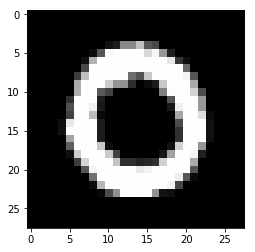

In [25]:
sample = X_train[1]          #selecting 1 image to test the result
plt.imshow( np.reshape( sample*255, (28,28) ), cmap = 'gray' )           #original image

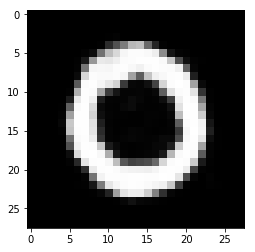

In [26]:
out = Model.predict( np.array([sample]) )             #final image after both encryption and decryption
out = np.array( out[0]*255, dtype=np.uint8 )          
plt.imshow( np.reshape(out, (28,28) ), cmap='gray' )

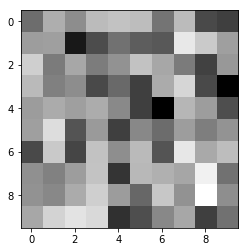

In [27]:
new = Encrypter.predict(np.array([sample]))           #displaying encrypted image
new = np.array( new[0]*255, dtype=np.uint8 )
plt.imshow( np.reshape(new, (10,10) ), cmap='gray' )